# 1. Import and Install Dependencies

In [2]:
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
!python --version

Python 3.9.13


In [4]:
%pwd

'C:\\Users\\himan\\Desktop\\Projects\\ActionDetectionforSignLanguage-main\\ActionDetectionforSignLanguage-main\\ActionDetectionforSignLanguage-main'

# 2. Keypoints using MP Holistic

In [5]:
mp_holistic = mp.solutions.holistic # Holistic model using mediapipe
mp_drawing = mp.solutions.drawing_utils # Drawing utilities saare points 

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
import mediapipe as mp

def draw_styled_landmarks(image, results):
    drawing_spec_face = mp.solutions.drawing_utils.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)  #points ko donate krega or colour ke hisaab se show kr dega apne ko
    drawing_spec_pose = mp.solutions.drawing_utils.DrawingSpec(color=(80, 22, 10), thickness=1, circle_radius=1)
    drawing_spec_hands = mp.solutions.drawing_utils.DrawingSpec(color=(121, 22, 76), thickness=1, circle_radius=1)

    # Draw face connections
    mp.solutions.drawing_utils.draw_landmarks(image, results.face_landmarks, mp.solutions.holistic.FACEMESH_TESSELATION, drawing_spec_face)

    # Draw pose connections
    mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp.solutions.holistic.POSE_CONNECTIONS, drawing_spec_pose)

    # Draw left hand connections
    mp.solutions.drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp.solutions.holistic.HAND_CONNECTIONS, drawing_spec_hands)

    # Draw right hand connections
    mp.solutions.drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp.solutions.holistic.HAND_CONNECTIONS, drawing_spec_hands)


In [14]:
cap = cv2.VideoCapture(0)  # for camera switch on
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed from camera
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
len(results.face_landmarks.landmark)

468

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

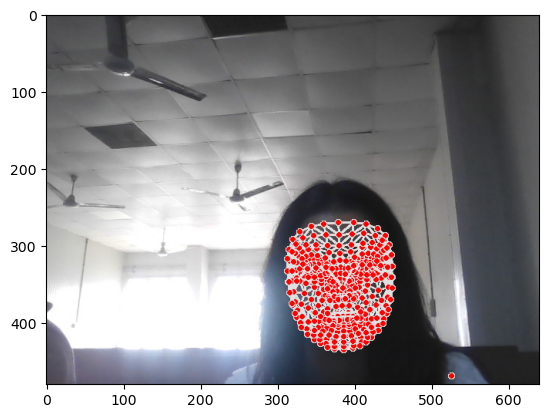

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
results.left_hand_landmarks

landmark {
  x: 0.6019179224967957
  y: 0.9044931530952454
  z: -1.3692860534320062e-07
}
landmark {
  x: 0.5443590879440308
  y: 0.9627285003662109
  z: 0.004557233303785324
}
landmark {
  x: 0.49535122513771057
  y: 0.9716730117797852
  z: 0.0023108297027647495
}
landmark {
  x: 0.461570680141449
  y: 0.9701991677284241
  z: -0.004065711051225662
}
landmark {
  x: 0.43757230043411255
  y: 0.9707313179969788
  z: -0.010263529606163502
}
landmark {
  x: 0.45687219500541687
  y: 0.8730149269104004
  z: 0.0069719343446195126
}
landmark {
  x: 0.4091227352619171
  y: 0.9175288081169128
  z: -0.007374213542789221
}
landmark {
  x: 0.38210082054138184
  y: 0.9483696818351746
  z: -0.01904575526714325
}
landmark {
  x: 0.36020898818969727
  y: 0.9743294715881348
  z: -0.02609112858772278
}
landmark {
  x: 0.45983263850212097
  y: 0.8615167737007141
  z: -0.004120707046240568
}
landmark {
  x: 0.40143030881881714
  y: 0.9135068655014038
  z: -0.017116442322731018
}
landmark {
  x: 0.373804330

In [12]:
pose = [] #1 list bnai or uske saari points strore kr rhe h
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
len(pose)

33

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face

array([ 0.54287994,  0.59966946, -0.0220109 , ...,  0.60282081,
        0.50724703,  0.00538234])

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [17]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.55672759,  0.56645399, -0.45181757, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.55672759,  0.56645399, -0.45181757, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [26]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'Father','Mother','Yes','No','Help','A','B','C'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [27]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [30]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [31]:



cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [35]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  #make neural network

In [37]:
label_map = {label:num for num, label in enumerate(actions)} #saare data ko label kr rha actions ke saath

In [38]:
label_map

{'hello': 0,
 'thanks': 1,
 'Father': 2,
 'Mother': 3,
 'Yes': 4,
 'No': 5,
 'Help': 6,
 'A': 7,
 'B': 8,
 'C': 9}

In [39]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [40]:
np.array(sequences).shape

(300, 30, 1662)

In [41]:
np.array(labels).shape

(300,)

In [42]:
X = np.array(sequences)

In [43]:
X.shape

(300, 30, 1662)

In [44]:
y = to_categorical(labels).astype(int)

In [45]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [47]:
y_test.shape

(30, 10)

# 7. Build and Train LSTM Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [49]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [50]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #total 6 layers hidden
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [51]:
res = [.7, 0.2, 0.1]

In [52]:
actions[np.argmax(res)]

'hello'

In [53]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [81]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback]) #fit the model train  and save 

Epoch 1/200
9/9 [==============================] - 6s 61ms/step - loss: 2.7976 - categorical_accuracy: 0.0963
Epoch 2/200
9/9 [==============================] - 1s 61ms/step - loss: 2.5124 - categorical_accuracy: 0.0852
Epoch 3/200
9/9 [==============================] - 1s 60ms/step - loss: 2.2983 - categorical_accuracy: 0.1074
Epoch 4/200
9/9 [==============================] - 1s 61ms/step - loss: 2.1863 - categorical_accuracy: 0.1963
Epoch 5/200
9/9 [==============================] - 1s 60ms/step - loss: 2.1622 - categorical_accuracy: 0.1889
Epoch 6/200
9/9 [==============================] - 1s 62ms/step - loss: 2.0747 - categorical_accuracy: 0.2148
Epoch 7/200
9/9 [==============================] - 1s 57ms/step - loss: 1.9316 - categorical_accuracy: 0.2481
Epoch 8/200
9/9 [==============================] - 1s 61ms/step - loss: 1.8686 - categorical_accuracy: 0.3111
Epoch 9/200
9/9 [==============================] - 1s 63ms/step - loss: 1.8054 - categorical_accuracy: 0.3259
Epoch 10/2

9/9 [==============================] - 1s 79ms/step - loss: 1.5490 - categorical_accuracy: 0.3481
Epoch 148/200
9/9 [==============================] - 1s 82ms/step - loss: 1.5028 - categorical_accuracy: 0.3852
Epoch 149/200
9/9 [==============================] - 1s 85ms/step - loss: 1.4165 - categorical_accuracy: 0.3926
Epoch 150/200
9/9 [==============================] - 1s 85ms/step - loss: 1.3198 - categorical_accuracy: 0.4889
Epoch 151/200
9/9 [==============================] - 1s 88ms/step - loss: 1.3635 - categorical_accuracy: 0.4593
Epoch 152/200
9/9 [==============================] - 1s 81ms/step - loss: 1.3719 - categorical_accuracy: 0.4370
Epoch 153/200
9/9 [==============================] - 1s 84ms/step - loss: 1.3167 - categorical_accuracy: 0.4963
Epoch 154/200
9/9 [==============================] - 1s 81ms/step - loss: 1.2667 - categorical_accuracy: 0.5296
Epoch 155/200
9/9 [==============================] - 1s 82ms/step - loss: 1.1957 - categorical_accuracy: 0.5481
Epoch 

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 596906 (2.28 MB)
Trainable params: 59690

# 8. Make Predictions

In [28]:
res = model.predict(X_test)

NameError: name 'model' is not defined

In [84]:
actions[np.argmax(res[4])]

'Help'

In [85]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [86]:
model.save('action.h')

INFO:tensorflow:Assets written to: action.h\assets


INFO:tensorflow:Assets written to: action.h\assets


In [54]:
model.load_weights('action.h')

# 10. Evaluation using Confusion Matrix and Accuracy

In [88]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [89]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 61ms/step


In [90]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [91]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[29,  0],
        [ 0,  1]],

       [[25,  2],
        [ 1,  2]],

       [[25,  0],
        [ 2,  3]],

       [[26,  1],
        [ 3,  0]],

       [[21,  6],
        [ 0,  3]],

       [[27,  1],
        [ 0,  2]],

       [[27,  0],
        [ 2,  1]],

       [[20,  4],
        [ 4,  2]],

       [[25,  1],
        [ 3,  1]]], dtype=int64)

In [92]:
accuracy_score(ytrue, yhat) # model ki accuracy

0.5